In [2]:
pip install spacy

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB 2.0 MB/s eta 0:00:06
   ---------------------------------------- 0.1/12.1 MB 825.8 kB/s eta 0:00:15
   ---------------------------------------- 0.1/12.1 MB 657.6 kB/s eta 0:00:19
   ---------------------------------------- 0.1/12.1 MB 585.1 kB/s eta 0:00:21
   ---------------------------------------- 0.1/12.1 MB 514.3 kB/s eta 0:00:24
    --------------------------------------- 0.2/12.1 MB 778.2 kB/s eta 0:00:16
    --------------------------------------- 0.2/12.1 MB 778.2 kB/s eta 0:00:16
   - -------------------------------------- 0.3/12.1 MB 846.5 kB/s eta 0:00:14
   - -------------------------------------- 0.4/12.1 MB 1.0 MB/s eta 0:00:12
   - -------------------------------------- 0.5/12.1 MB 1.1 MB/s eta 0:00:11
   -- ------------------------------------- 0.6/12.1 MB 1.2 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/12.1 MB 1.1 MB/s eta 

In [2]:
pip install afinn


     ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.6 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.6 kB 165.2 kB/s eta 0:00:01
     -------------- ----------------------- 20.5/52.6 kB 165.2 kB/s eta 0:00:01
     ----------------------------- -------- 41.0/52.6 kB 178.6 kB/s eta 0:00:01
     -------------------------------------- 52.6/52.6 kB 181.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53439 sha256=f44c8dd051c1d5420e61d6db900fec323dae3f43624ac431cfbf37f8e2913ba9
  Stored in directory: c:\users\siban\appdata\local\pip\cache\wheels\ee\d3\a0\f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [ ]:
import concurrent.futures
import spacy
import string
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from afinn import Afinn

In [14]:
# Load data
import pandas as pd 
df = pd.read_csv('Reviews.csv')
df.head(5)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


In [17]:
df["userName"].unique()


array(['Mar Zur', 'Devin Rivera', 'Heidi Kinsley', ..., 'Kamiyah Dorsey',
       'Keturah Pender', 'Bhagwan Singh Virik'], dtype=object)

In [19]:
df["appId"].unique()

array(['com.anydo', 'com.todoist', 'com.ticktick.task',
       'com.habitrpg.android.habitica', 'cc.forestapp',
       'com.oristats.habitbull', 'com.levor.liferpgtasks', 'com.habitnow',
       'com.microsoft.todos', 'prox.lab.calclock',
       'com.gmail.jmartindev.timetune', 'com.artfulagenda.app',
       'com.tasks.android', 'com.appgenix.bizcal', 'com.appxy.planner'],
      dtype=object)

In [21]:
# Data loading and preprocessing
df = pd.read_csv(r"D:\Insosys sb Internship\Data preprocessing\reviews.csv", encoding='latin-1')
df['content'] = df['content'].str.lower()

# Data cleaning
from nltk.corpus import stopwords
nltk.download('stopwords')
# For the removal of stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"] # customizing the stop words by adding new stop words
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...


{'where', 'more', "mightn't", 'such', 'the', 'to', 'here', 'most', "you'd", 'didn', 'into', 'about', 'wouldn', 'why', "that'll", "you're", 'before', 'was', "wouldn't", 'his', 'because', 'o', 'my', "isn't", 'an', 'their', "you've", 'own', 'ours', "don't", 'ourselves', "couldn't", 'hadn', 'at', 'when', 'too', 'she', 'but', 'aren', 'its', 'after', 'if', 'no', 'don', 'all', 'shall', "shan't", 'how', 'once', 'above', "wasn't", "hadn't", "mustn't", 'both', 'they', 'those', 'doing', "didn't", 'while', 'so', "hasn't", 'be', 'you', 'were', 'is', 'some', 'again', "aren't", 'doesn', 't', 'hasn', 'her', 'mustn', 'yourselves', 'him', 'this', 'off', 'me', 'yours', 'few', "weren't", 'other', 'just', 'himself', 'under', 'does', 'did', 'through', 'd', "it's", "shouldn't", 'll', 'with', 'ain', 'isn', "you'll", 'who', 'yourself', 'during', 'can', 'until', 'we', 'y', 'wasn', 'any', 'might', 'below', 'itself', 'your', 'weren', 'theirs', 'them', 'will', 'have', 'for', 'shan', 'what', 'or', 'are', 'myself', 

[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
 #removing the rows which has null values
df = df.dropna(subset=['content'])
df.isna().sum()


reviewId                   0
userName                   0
userImage                  0
content                    0
thumbsUpCount              0
reviewCreatedVersion    2357
at                         0
replyContent            7619
repliedAt               7619
appVersion              2357
sortOrder                  0
appId                      0
dtype: int64

In [24]:
def create_slang_dictionary(filename): 
    chart_words = {}
    with open(filename, 'r') as file:
        for line in file:
            # Remove trailing newline character
            line = line.strip()
            # Split the line on the equals sign (=)
            abbreviation, meaning = line.split('=')
            chart_words[abbreviation] = meaning
    return chart_words

 
filename = r"D:\Insosys sb Internship\Data preprocessing\slang.txt" # recieved the file through exploration in net for data preprocessing
chart_words = create_slang_dictionary(filename)
print(chart_words) # set of slang and their expansion to it


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great', 'G9': 'Genius', 'IC': 'I See', 'IDK': 'I Do not know', 'ICQ': 'I Seek you', 'ILU': 'I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IM': 'I am', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh', 'LOL': 'Laugh

In [25]:
# Helps to remove the html tags, due to web scraping results to present of html tags 
def remove_html_tags(text): 
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

# removes punctuations
def remove_special_character(content): 
    return re.sub(r'[^a-zA-Z ]',' ', content )

#Removal of URLs
def remove_url(content): 
    return re.sub(r'http\S+', '', content)

# remove stop words from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

#Slang expansions
def replace_string(text,chart_words): 
    words = text.split()
    new_words = []
    for word in words:
        if word.upper() in chart_words:
            new_words.append(chart_words[word.upper()])  
        else:
            new_words.append(word)
    return " ".join(new_words)  
    

In [26]:
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

In [27]:
#Data preprocessing done by calling all the defined functions here
def data_cleaning(content):
    if not pd.isna(content):  #Issue counterd as removed the null rows periviously 
        content = remove_html_tags(content)
        content = remove_url(content)
        content = remove_special_character(content)
        content = contraction_expansion(content)
        content = replace_string(content,chart_words)
        content = remove_stopwords(content)
    return content


In [29]:
df['content']=df['content'].apply(data_cleaning) ## calling functions to complete the task
df['content'].head(10) 

0    recurring tasks every day need list reminder b...
1    instead shopping around downloaded widely used...
2    every blue app asks update acct emails everyth...
3    terrible update app used perfect planning cert...
4    app deceivingly terrible really nice design fe...
5    smart grocery list hell handy sort list catago...
6    wunderlist everything needed issues app replac...
7    app almost year really enjoying mostly used gr...
8    almost perfect developers choose ignore one im...
9    annoyed keep signing deleted lists ive working...
Name: content, dtype: object

In [33]:
#Lemmatization 
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df['content']

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        recurring task every day need list reminder bu...
1        instead shopping around downloaded widely used...
2        every blue app asks update acct email everythi...
3        terrible update app used perfect planning cert...
4        app deceivingly terrible really nice design fe...
                               ...                        
16782                                        excellent app
16783    love easy use make life organize love way put ...
16784        love make plan check app almost everyday love
16785                                       exactly needed
16786                                                 good
Name: content, Length: 16786, dtype: object

In [34]:
#checking the Data after lematization
df['content'].info()
df.info()

<class 'pandas.core.series.Series'>
Index: 16786 entries, 0 to 16786
Series name: content
Non-Null Count  Dtype 
--------------  ----- 
16786 non-null  object
dtypes: object(1)
memory usage: 262.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16786 non-null  object
 1   userName              16786 non-null  object
 2   userImage             16786 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16786 non-null  int64 
 5   reviewCreatedVersion  14429 non-null  object
 6   at                    16786 non-null  object
 7   replyContent          9167 non-null   object
 8   repliedAt             9167 non-null   object
 9   appVersion            14429 non-null  object
 10  sortOrder             16786 non-null  object
 11  appId                 16786 non-null  ob

In [40]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 131.3 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 145.2 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 145.2 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/300.2 kB 187.0 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/300.2 kB 269.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 359.9 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 357.2 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 357.2 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/300.2 kB 565.1 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/300.2 kB 565.1 kB/

[nltk_data] Error loading wordcloud: Package 'wordcloud' not found in
[nltk_data]     index


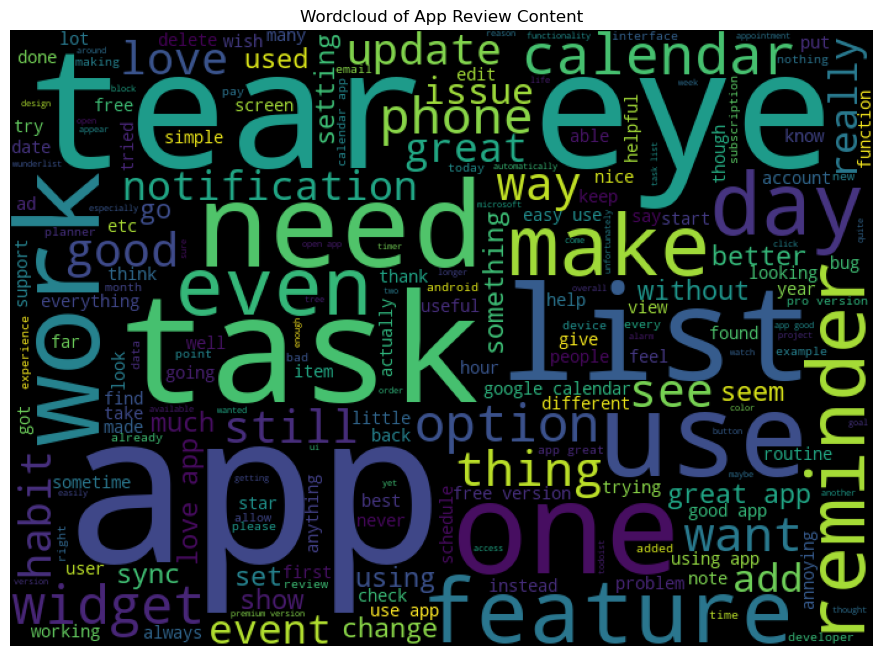

In [44]:

import nltk  # (optional, uncomment if needed)
nltk.download('wordcloud')  # (uncomment if using nltk to download wordcloud)

from wordcloud import WordCloud

wordcloud = WordCloud(width=700, height=500, background_color="black")
wordcloud.generate(" ".join(df['content']))

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of App Review Content")
plt.show()


In [45]:
df['content'].str.len().describe()

count    16786.000000
mean       149.925057
std        108.290553
min          0.000000
25%         56.000000
50%        133.000000
75%        241.000000
max       1471.000000
Name: content, dtype: float64

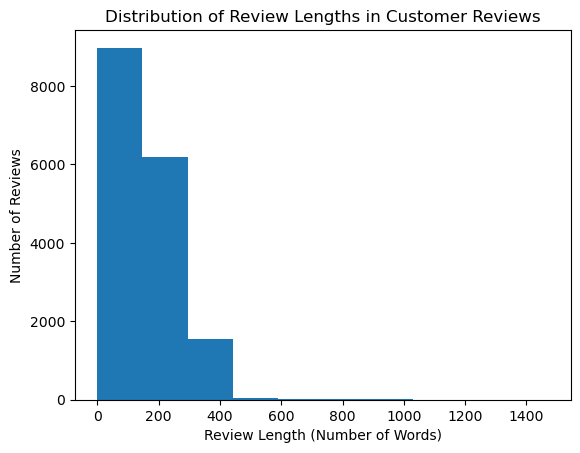

In [43]:
plt.xlabel("Review Length (Number of Words)")  
plt.ylabel("Number of Reviews")  
plt.title("Distribution of Review Lengths in Customer Reviews")  
plt.hist(df['content'].str.len()) # Visual Graph for Review length distribution
plt.show()

In [46]:
# Pre-compute the sentiment scores for each word in the AFINN lexicon
#pip install afinn #uncomment if not installed 
from afinn import Afinn
afinn = Afinn()
def get_afinn_score(text): ## calulating score
    return afinn.score(text)

def get_sentiment_label(score): ## setting labels
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'


In [48]:
df['sentiment_score_afinn'] = df['content'].apply(get_afinn_score)
df['sentiment_label_afinn'] = df['sentiment_score_afinn'].apply(get_sentiment_label)
sentiment_df=df[['content','sentiment_label_afinn','sentiment_score_afinn','appId']]
sentiment_df.head(10)

,content,sentiment_label_afinn,sentiment_score_afinn,appId
0,recurring task every day need list reminder bu...,negative,-4.0,com.anydo
1,instead shopping around downloaded widely used...,positive,3.0,com.anydo
2,every blue app asks update acct email everythi...,negative,-10.0,com.anydo
3,terrible update app used perfect planning cert...,positive,4.0,com.anydo
4,app deceivingly terrible really nice design fe...,neutral,0.0,com.anydo
5,smart grocery list hell handy sort list catago...,negative,-2.0,com.anydo
6,wunderlist everything needed issue app replace...,positive,2.0,com.anydo
7,app almost year really enjoying mostly used gr...,neutral,0.0,com.anydo
8,almost perfect developer choose ignore one imp...,negative,-1.0,com.anydo
9,annoyed keep signing deleted list ive working ...,positive,1.0,com.anydo


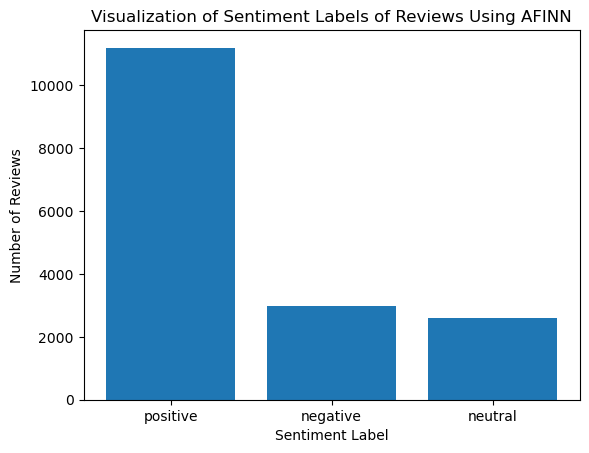

In [49]:
sentiment_counts = sentiment_df['sentiment_label_afinn'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Visualization of Sentiment Labels of Reviews Using AFINN")
plt.show()

In [53]:
# NCR Lexicon


In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...


True

In [52]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

# Sentiment analyzer object
analyzer = sia()

def get_nrc_sentiment(sentence):
    text = nltk.word_tokenize(sentence)  # Tokenize the text
 
    sentiment_scores = analyzer.polarity_scores(sentence) # calculation of sentiment score using nrc library

    return sentiment_scores

# Apply the function to your content column
sentiment_df['sentiment_nrc'] = sentiment_df['content'].apply(get_nrc_sentiment)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\siban\AppData\Local\Temp\ipykernel_34200\3041816096.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_nrc'] = sentiment_df['content'].apply(get_nrc_sentiment)


In [54]:
# apply the labels for the respective nrc_scores
def label_sentiment(nrc_score_dict):
    compound_score = nrc_score_dict['compound']
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment_df['sentiment_label_nrc'] = sentiment_df['sentiment_nrc'].apply(label_sentiment)
sentiment_df



C:\Users\siban\AppData\Local\Temp\ipykernel_34200\1603948534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_label_nrc'] = sentiment_df['sentiment_nrc'].apply(label_sentiment)


,content,sentiment_label_afinn,sentiment_score_afinn,appId,sentiment_nrc,sentiment_label_nrc
0,recurring task every day need list reminder bu...,negative,-4.0,com.anydo,"{'neg': 0.192, 'neu': 0.709, 'pos': 0.099, 'co...",Negative
1,instead shopping around downloaded widely used...,positive,3.0,com.anydo,"{'neg': 0.052, 'neu': 0.887, 'pos': 0.062, 'co...",Positive
2,every blue app asks update acct email everythi...,negative,-10.0,com.anydo,"{'neg': 0.193, 'neu': 0.771, 'pos': 0.037, 'co...",Negative
3,terrible update app used perfect planning cert...,positive,4.0,com.anydo,"{'neg': 0.124, 'neu': 0.619, 'pos': 0.257, 'co...",Positive
4,app deceivingly terrible really nice design fe...,neutral,0.0,com.anydo,"{'neg': 0.105, 'neu': 0.593, 'pos': 0.302, 'co...",Positive
...,...,...,...,...,...,...
16782,excellent app,positive,3.0,com.appxy.planner,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",Positive
16783,love easy use make life organize love way put ...,positive,13.0,com.appxy.planner,"{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'comp...",Positive
16784,love make plan check app almost everyday love,positive,6.0,com.appxy.planner,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",Positive
16785,exactly needed,neutral,0.0,com.appxy.planner,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [ ]:
### Analysis of the Labels from Different Models
### AFINN

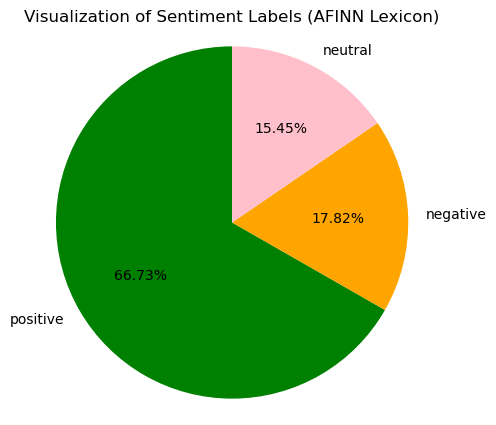

In [55]:
# Counting occurrences of each sentiment label using value_counts()
sentiment_counts = sentiment_df['sentiment_label_afinn'].value_counts().reset_index(name='count')


plt.figure(figsize=(5, 5))  
# Using pie Chart
plt.pie(sentiment_counts['count'], labels=sentiment_counts['sentiment_label_afinn'], autopct="%1.2f%%", startangle=90,
       colors=['green', 'orange', 'pink'])  

plt.title("Visualization of Sentiment Labels (AFINN Lexicon)")
plt.axis('equal')  
plt.show()